# Batch Gradient Descent


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.markers import MarkerStyle
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../../Datasets/Property.csv")
df.sample(5)

,area,bedrooms,price
17,1540,3,60
8,1310,3,50
5,1170,2,38
1,2600,4,120
7,3300,4,155


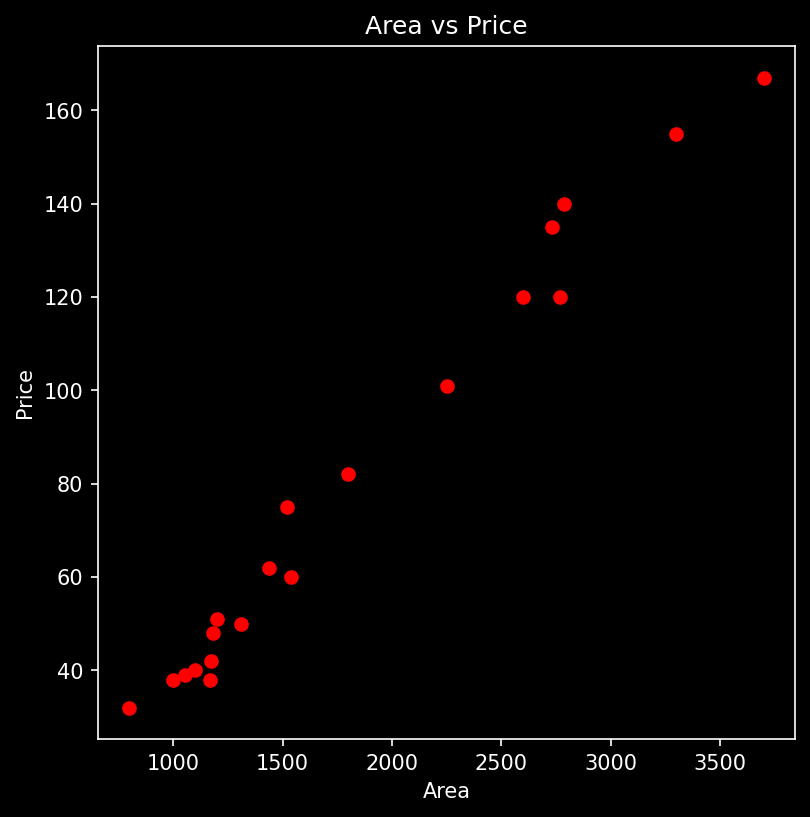

In [3]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
area = df["area"]
price = df["price"]
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.scatter(area, price, c="red", marker=MarkerStyle("o"))
plt.savefig("Images/area_vs_price.png", bbox_inches="tight")

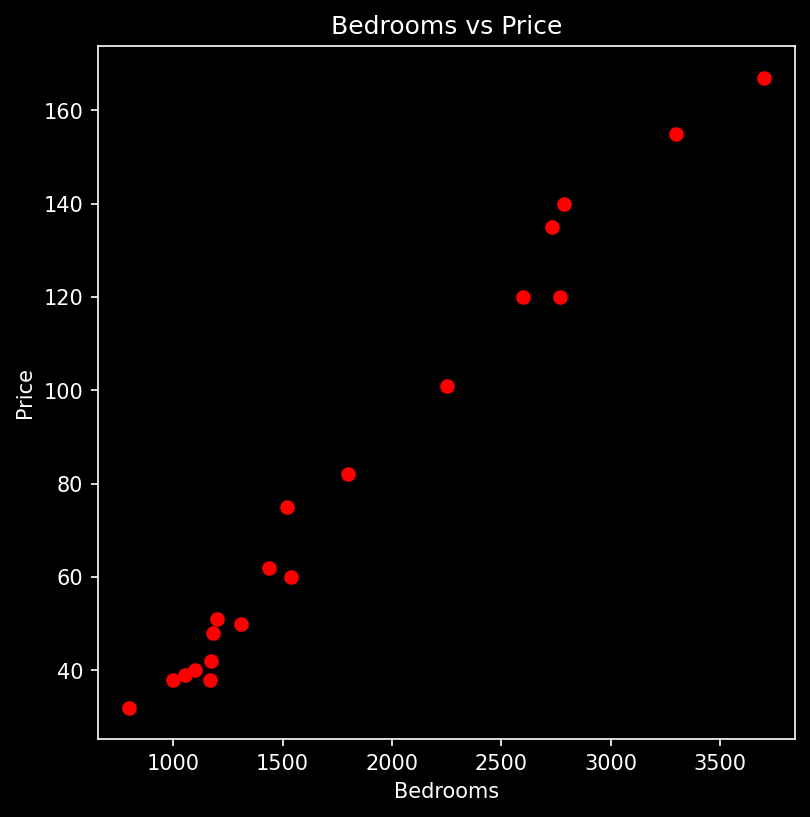

In [4]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
bedrooms = df["bedrooms"]
price = df["price"]
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs Price")
plt.scatter(area, price, c="red", marker=MarkerStyle("o"))
plt.savefig("Images/bedrooms_vs_price.png", bbox_inches="tight")

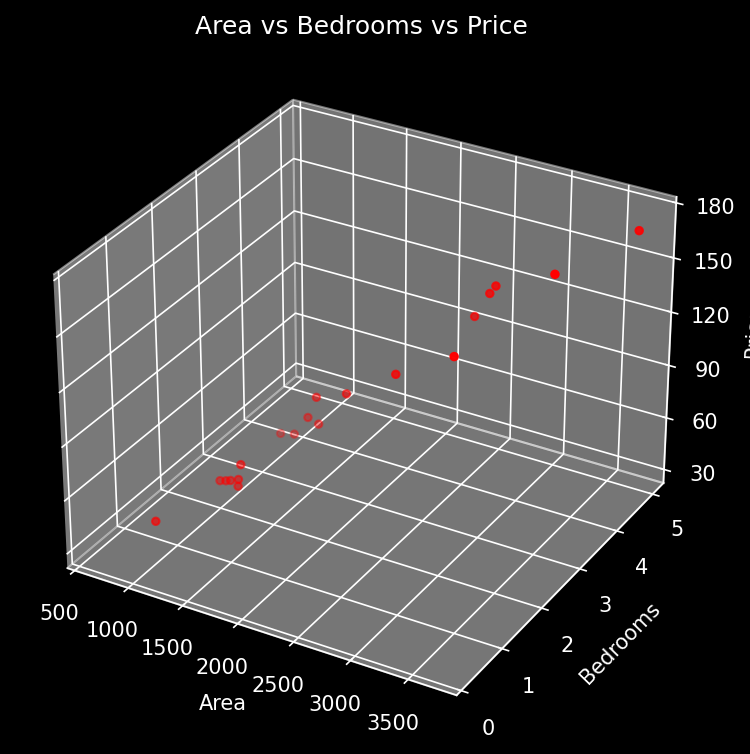

In [5]:
fig = plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
ax = fig.add_subplot(111, projection="3d")
ax.scatter(area, bedrooms, price, color="red", marker=MarkerStyle("."), s=50)  # type: ignore
ax.set_xticks(np.arange(500, 4000, 500))
ax.set_yticks(np.arange(0, 6, 1))
ax.set_zticks(np.arange(30, 200, 30))  # type: ignore
ax.set_xlabel("Area")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")  # type: ignore
ax.set_title("Area vs Bedrooms vs Price")
plt.savefig("Images/area_vs_bedrooms_vs_price.png", bbox_inches="tight")

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [8]:
def batch_gradient_descent(x, y_true, epochs=500, learning_rate=0.01):
    number_of_features = x.shape[1]  # our case number_of_features = 2 (area, bedroom)
    w = np.ones(number_of_features)  # initialize weights to 1
    b = 0  # initialize bias to 0
    total_samples = x.shape[0]  # number of rows in x
    cost_list = []
    epoch_list = []
    cost = None  # initialize cost to None

    for epoch in range(epochs):
        y_predicted = w @ x.T + b  # y_predicted = wx + b
        error = y_true - y_predicted  # error = y_true - y_predicted
        w_grad = -(2 / total_samples) * (
            error @ x
        )  # w_grad = -(2/total_samples)*(error*x)
        b_grad = -(2 / total_samples) * np.sum(
            error
        )  # b_grad = -(2/total_samples)*(sum(error))
        w -= learning_rate * w_grad
        b -= learning_rate * b_grad
        cost = np.sum(error**2) / total_samples
        if epoch % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(epoch)
    return w, b, cost, cost_list, epoch_list


w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, y)
w, b, cost

(array([34.31248402,  8.91288029]), 79.74672833718462, 39.844429294193375)

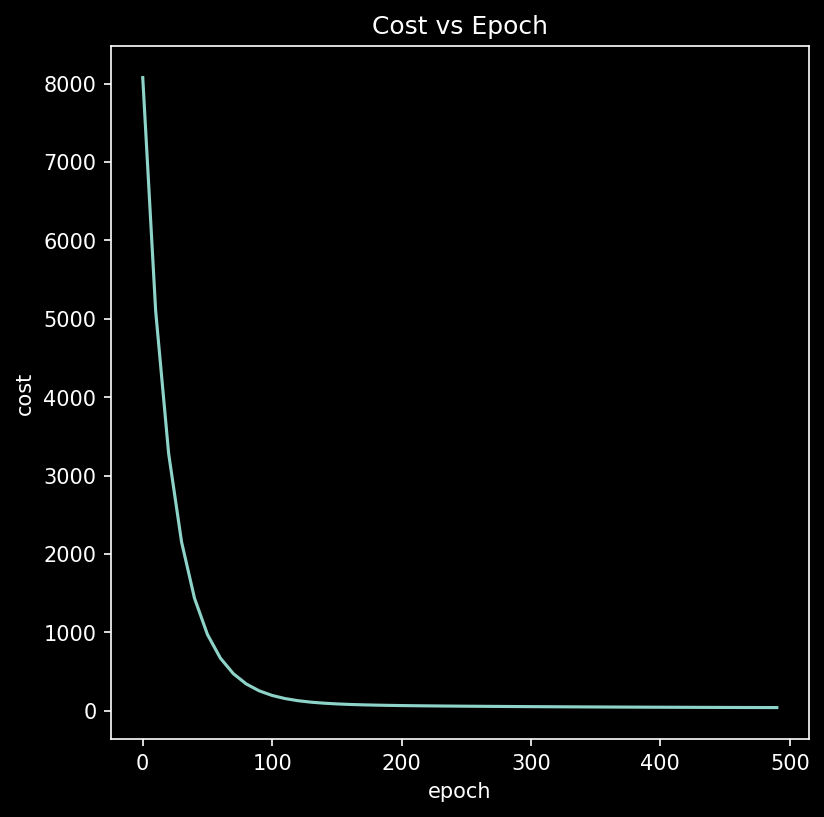

In [9]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Cost vs Epoch")
plt.plot(epoch_list, cost_list)
plt.savefig("Images/cost_vs_epoch_BGD.png", bbox_inches="tight")

In [10]:
def predict(x):
    scaled_x = scaler.fit_transform(x)
    y_pred = w @ scaled_x.T + b
    return y_pred

In [11]:
predict(X)

array([ 40.0776456 , 121.83872008,  65.16029893,  68.45831078,
        45.94077777,  44.7192919 , 127.21325791, 150.34005703,
        59.8671935 , 176.07416949,  79.81812936, 129.37121627,
        37.79753864,  41.86915821,  98.1404174 ,  44.92287288,
        54.57408807,  69.2319185 , 119.31283913,  20.2066653 ])